In [19]:
import os
import sys
import pandas as pd
import numpy as np
import nltk
from IPython.display import display

# grab the data
data = pd.read_csv('dataset.csv')
jp = pd.read_csv('data_jp.csv')
njp = pd.read_csv('data_njp.csv')

## Training the Regular registrations

In [7]:
Y = njp[['is_lolos_seleksi']]
X = njp.drop(['is_lolos_seleksi'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape

((510, 11), (510, 11))

### with criterion gini index

Model accuracy score with criterion gini index: 0.9275
Training-set accuracy score: 0.9588
Training set score: 0.9588
Test set score: 0.9275


[Text(0.6666666666666666, 0.875, 'is_lolos_seleksi <= 1.5\ngini = 0.259\nsamples = 510\nvalue = [78, 432]'),
 Text(0.5, 0.625, 'lokasi <= 0.5\ngini = 0.36\nsamples = 102\nvalue = [78, 24]'),
 Text(0.3333333333333333, 0.375, 'id_daftar_sekolah <= 1749.0\ngini = 0.42\nsamples = 80\nvalue = [56, 24]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.335\nsamples = 61\nvalue = [48, 13]'),
 Text(0.5, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 408\nvalue = [0, 408]')]

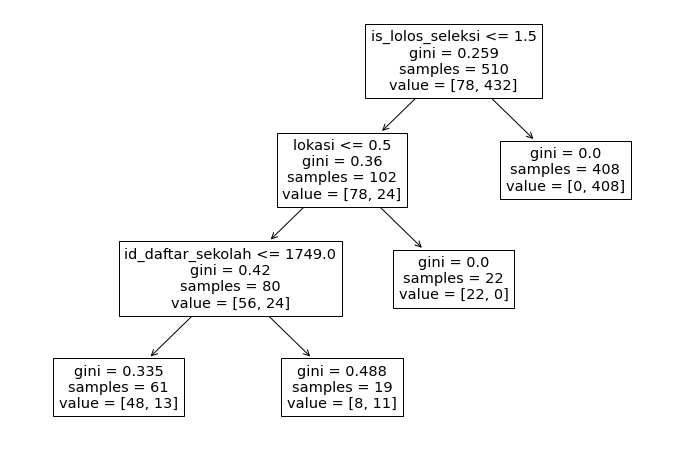

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=njp.columns) 

### with criterion Enthropy 

Model accuracy score with criterion entropy: 0.9275
Training-set accuracy score: 0.9588
Training set score: 0.9588
Test set score: 0.9275


[Text(0.6666666666666666, 0.875, 'is_lolos_seleksi <= 1.5\nentropy = 0.617\nsamples = 510\nvalue = [78, 432]'),
 Text(0.5, 0.625, 'lokasi <= 0.5\nentropy = 0.787\nsamples = 102\nvalue = [78, 24]'),
 Text(0.3333333333333333, 0.375, 'id_daftar_sekolah <= 1749.0\nentropy = 0.881\nsamples = 80\nvalue = [56, 24]'),
 Text(0.16666666666666666, 0.125, 'entropy = 0.747\nsamples = 61\nvalue = [48, 13]'),
 Text(0.5, 0.125, 'entropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 408\nvalue = [0, 408]')]

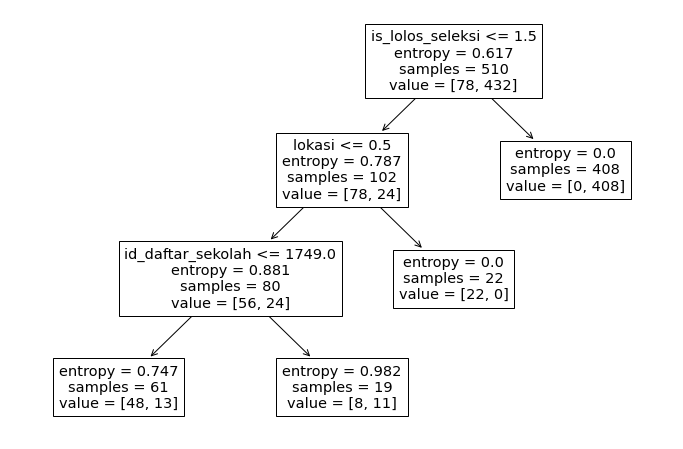

In [12]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),feature_names=njp.columns) 

## Training the Special registrations

In [20]:
Y = jp[['is_lolos_seleksi']]
X = jp.drop(['is_lolos_seleksi'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)
X_train.shape, X_test.shape

((812, 9), (812, 9))

### with criterion gini index

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

# Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

# Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# Compare the train-set and test-set accuracy
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train),feature_names=njp.columns) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### with criterion Enthropy 

In [18]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(X_test)

# Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

# Compare the train-set and test-set accuracy
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

# Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

# Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train),feature_names=njp.columns) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').